In [1]:
import sys, os
sys.path.append('../')

In [2]:
import numpy as np
import matplotlib;

matplotlib.use('agg')
from matplotlib.image import imread
import matplotlib.pyplot as plt
from skimage.segmentation import (morphological_chan_vese,
                                  checkerboard_level_set)
import sys
import os
import re

In [3]:
%matplotlib inline

In [4]:
regex = re.compile(r'\d+')
in_folder = '/storage/yw18581/data/V2_8bit/'
f_no = 0
dist = 20
out_folder = '/storage/yw18581/data/V2_8bit/test_mask/'
# data_dir = '/Users/cdesio/UoB/Jordan'
fname_key = 'File'

In [5]:
split = fname_key.split("_")
split.append(str(f_no))
img_path = os.path.join(in_folder, '{}.tiff'.format('_'.join(split)))
image = imread(img_path)
print(img_path)
print("import image and select profile")

/storage/yw18581/data/V2_8bit/File_0.tiff
import image and select profile


In [6]:
def calculate_profile(image):
    # Initial level set
    init_ls = checkerboard_level_set(image.shape, 5)
    # List with intermediate results for plotting the evolution

    ls = morphological_chan_vese(image, 10, init_level_set=init_ls, smoothing=5)
    return ls

In [7]:
ls = calculate_profile(image)
print("select leaf")

select leaf


In [31]:
def show_img_cont(image,ls):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(image, cmap="gray")
    #ax.set_axis_off()
    ax.contour(ls,[0.5], colors='r')
    #ax.set_title("Morphological ACWE segmentation", fontsize=12)
    plt.show()
    return

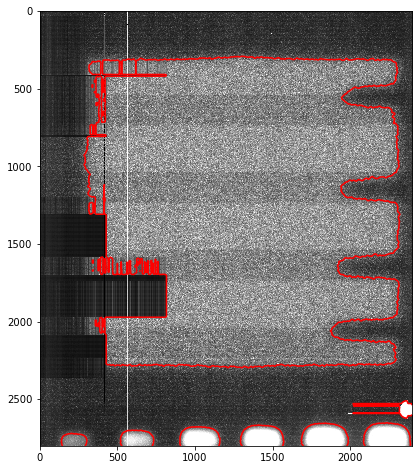

In [32]:
show_img_cont(image, ls)

In [68]:
lower=450
upper=2200

In [104]:
def select_profile(array, lower=450, upper=2200):
    arr = np.argwhere(array[lower:upper])
    y = arr[:, 0]
    X = arr[:, 1]
    y_uniques = np.unique(y)
    y_out = [np.max(X[y == yi]) for yi in y_uniques]
    leaf = np.column_stack((y_uniques+lower, y_out))
    plt.plot(leaf[:,1], leaf[:,0], c='r')
    plt.xlim(0,2400)
    plt.ylim(2800,0)
    plt.show()
    return leaf

In [70]:
# leaf = select_profile(ls[1000:1280])
leaf = select_profile(ls)
leaf_position = np.min(leaf[:, 1])
print("calculated leaf position:{}".format(leaf_position))

calculated leaf position:1871


In [111]:
range_list =[(430, 700), 
             (1000, 1300),
             (1450, 1800),
             (1900, 2240)]

In [ ]:
if leaf_position >= 2300:
    ls_inv = (~ls.astype(bool)).astype(int)
    leaf = select_profile_2(ls_inv[1000:1280])
    leaf_position = np.min(leaf[:, 1])
    print("new leaf position: {}".format(leaf_position))



In [119]:
def select_multiple_profiles(ls, range_list):
    leaves = []
    for low, up in range_list:
        leaf = select_profile(ls,low, up)
        leaf_position = np.min(leaf[:,1])
        if leaf_position>=2300:
            ls_inv = (~ls.astype(bool)).astype(int)
            leaf_inv = select_profile(ls_inv)
            leaves.append(leaf_inv)
        else:
            leaves.append(leaf)
    return leaves

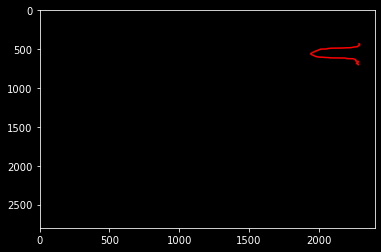

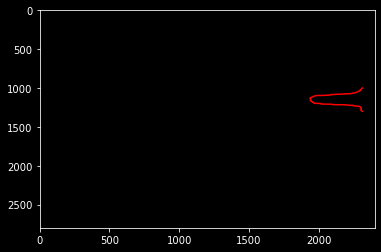

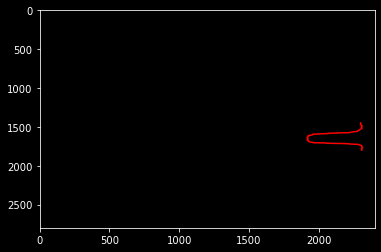

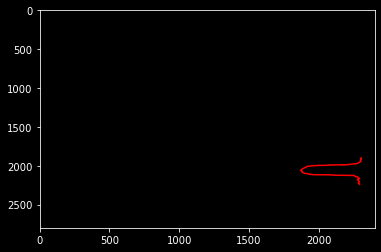

In [120]:
leaves = select_multiple_profiles(ls, range_list)

(2800, 0)

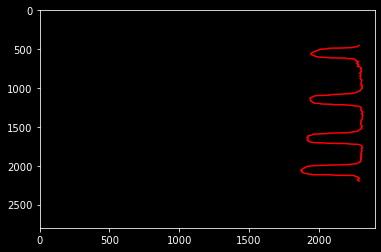

In [71]:
plt.plot(leaf[:,1], leaf[:,0]+lower,c='r')
plt.xlim(0,2400)
plt.ylim(2800,0)

In [121]:
def check_borders(leaves):
    for leaf in leaves:
        index = []
        for i, (j, k) in enumerate(leaf):
            if i < len(leaf) - 1:
                if np.abs(k - leaf[i + 1][1]) > 200 or np.abs(k - leaf[i + 1][1]) == 0:
                    if leaf[i][1] >= leaf[i + 1][1]:
                        index.append(i)
                    elif leaf[i + 1][1] > leaf[i][1]:
                        index.append(i + 1)
        leaf = np.delete(leaf, index, axis=0)

        if np.abs(leaf[-1][1] - leaf[-2][1] >= 200):
            print("found it")
            if leaf[-1][1] > leaf[-2][1]:
                print("and change it")
                leaf[-1][1] = leaf[-2][1]
                print(leaf[-1][1])
        print("done")
    return leaves

In [122]:
check_borders(leaves)

done
done
done
done


[array([[ 430, 2289],
        [ 431, 2290],
        [ 432, 2290],
        [ 433, 2291],
        [ 434, 2292],
        [ 435, 2292],
        [ 436, 2293],
        [ 437, 2293],
        [ 438, 2293],
        [ 439, 2294],
        [ 440, 2294],
        [ 441, 2294],
        [ 442, 2294],
        [ 443, 2293],
        [ 444, 2293],
        [ 445, 2292],
        [ 446, 2291],
        [ 447, 2291],
        [ 448, 2290],
        [ 449, 2290],
        [ 450, 2289],
        [ 451, 2288],
        [ 452, 2288],
        [ 453, 2287],
        [ 454, 2286],
        [ 455, 2285],
        [ 456, 2284],
        [ 457, 2283],
        [ 458, 2282],
        [ 459, 2281],
        [ 460, 2281],
        [ 461, 2280],
        [ 462, 2280],
        [ 463, 2280],
        [ 464, 2280],
        [ 465, 2279],
        [ 466, 2279],
        [ 467, 2278],
        [ 468, 2277],
        [ 469, 2275],
        [ 470, 2259],
        [ 471, 2257],
        [ 472, 2254],
        [ 473, 2250],
        [ 474, 2248],
        [ 

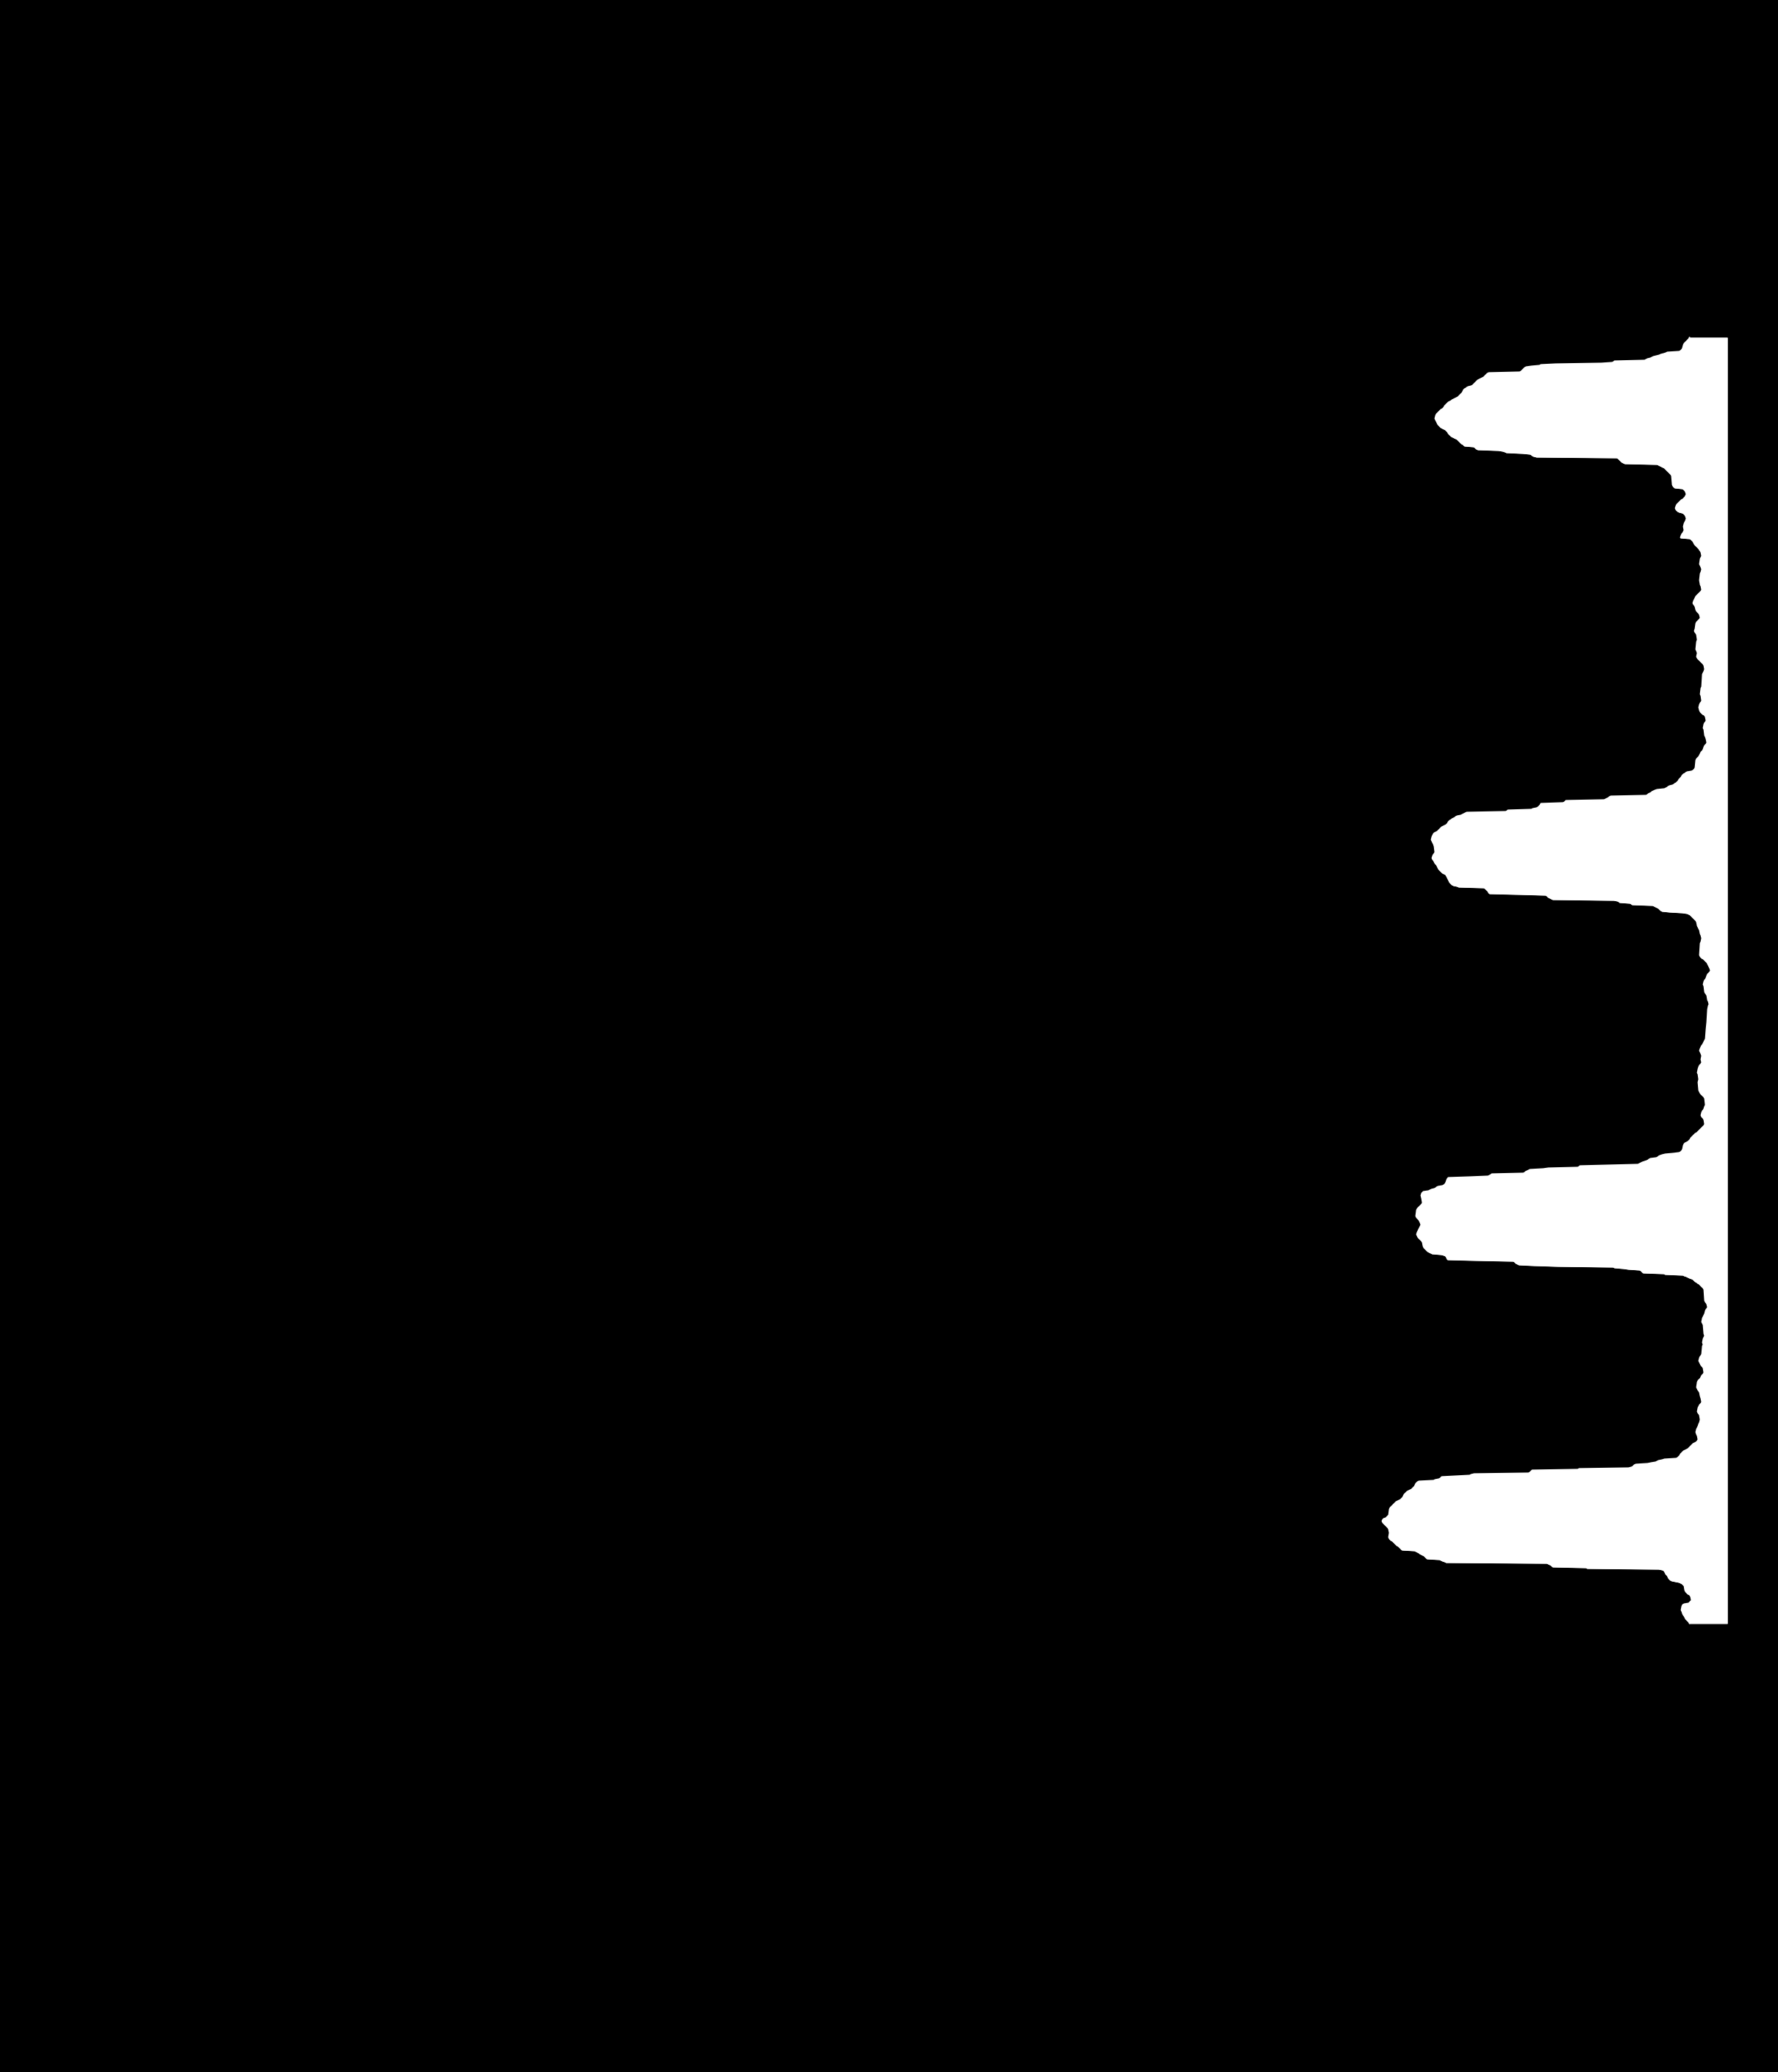

In [67]:
plt.figure(figsize=(2400 / 96, 2800 / 96), dpi=96)
plt.style.use('dark_background')
plt.axes([0, 0, 1, 1], frameon=False)
plt.plot(leaf[:, 1], leaf[:, 0] + 450, c='w', alpha=1)
plt.fill_betweenx(leaf[:, 0] + 450, leaf[:, 1], x2=2340, color='w', alpha=1)
fig = plt.imshow(image, cmap="gray", alpha=0)
plt.ylim(2800, 0)
plt.xlim(0, 2400)
plt.box(False)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig("mask_only.tiff")
#plt.savefig(os.path.join(out_folder, '{}_{}mm_mask_{}.tiff'.format('_'.join(split), dist, leaf_position)))
plt.close('all')



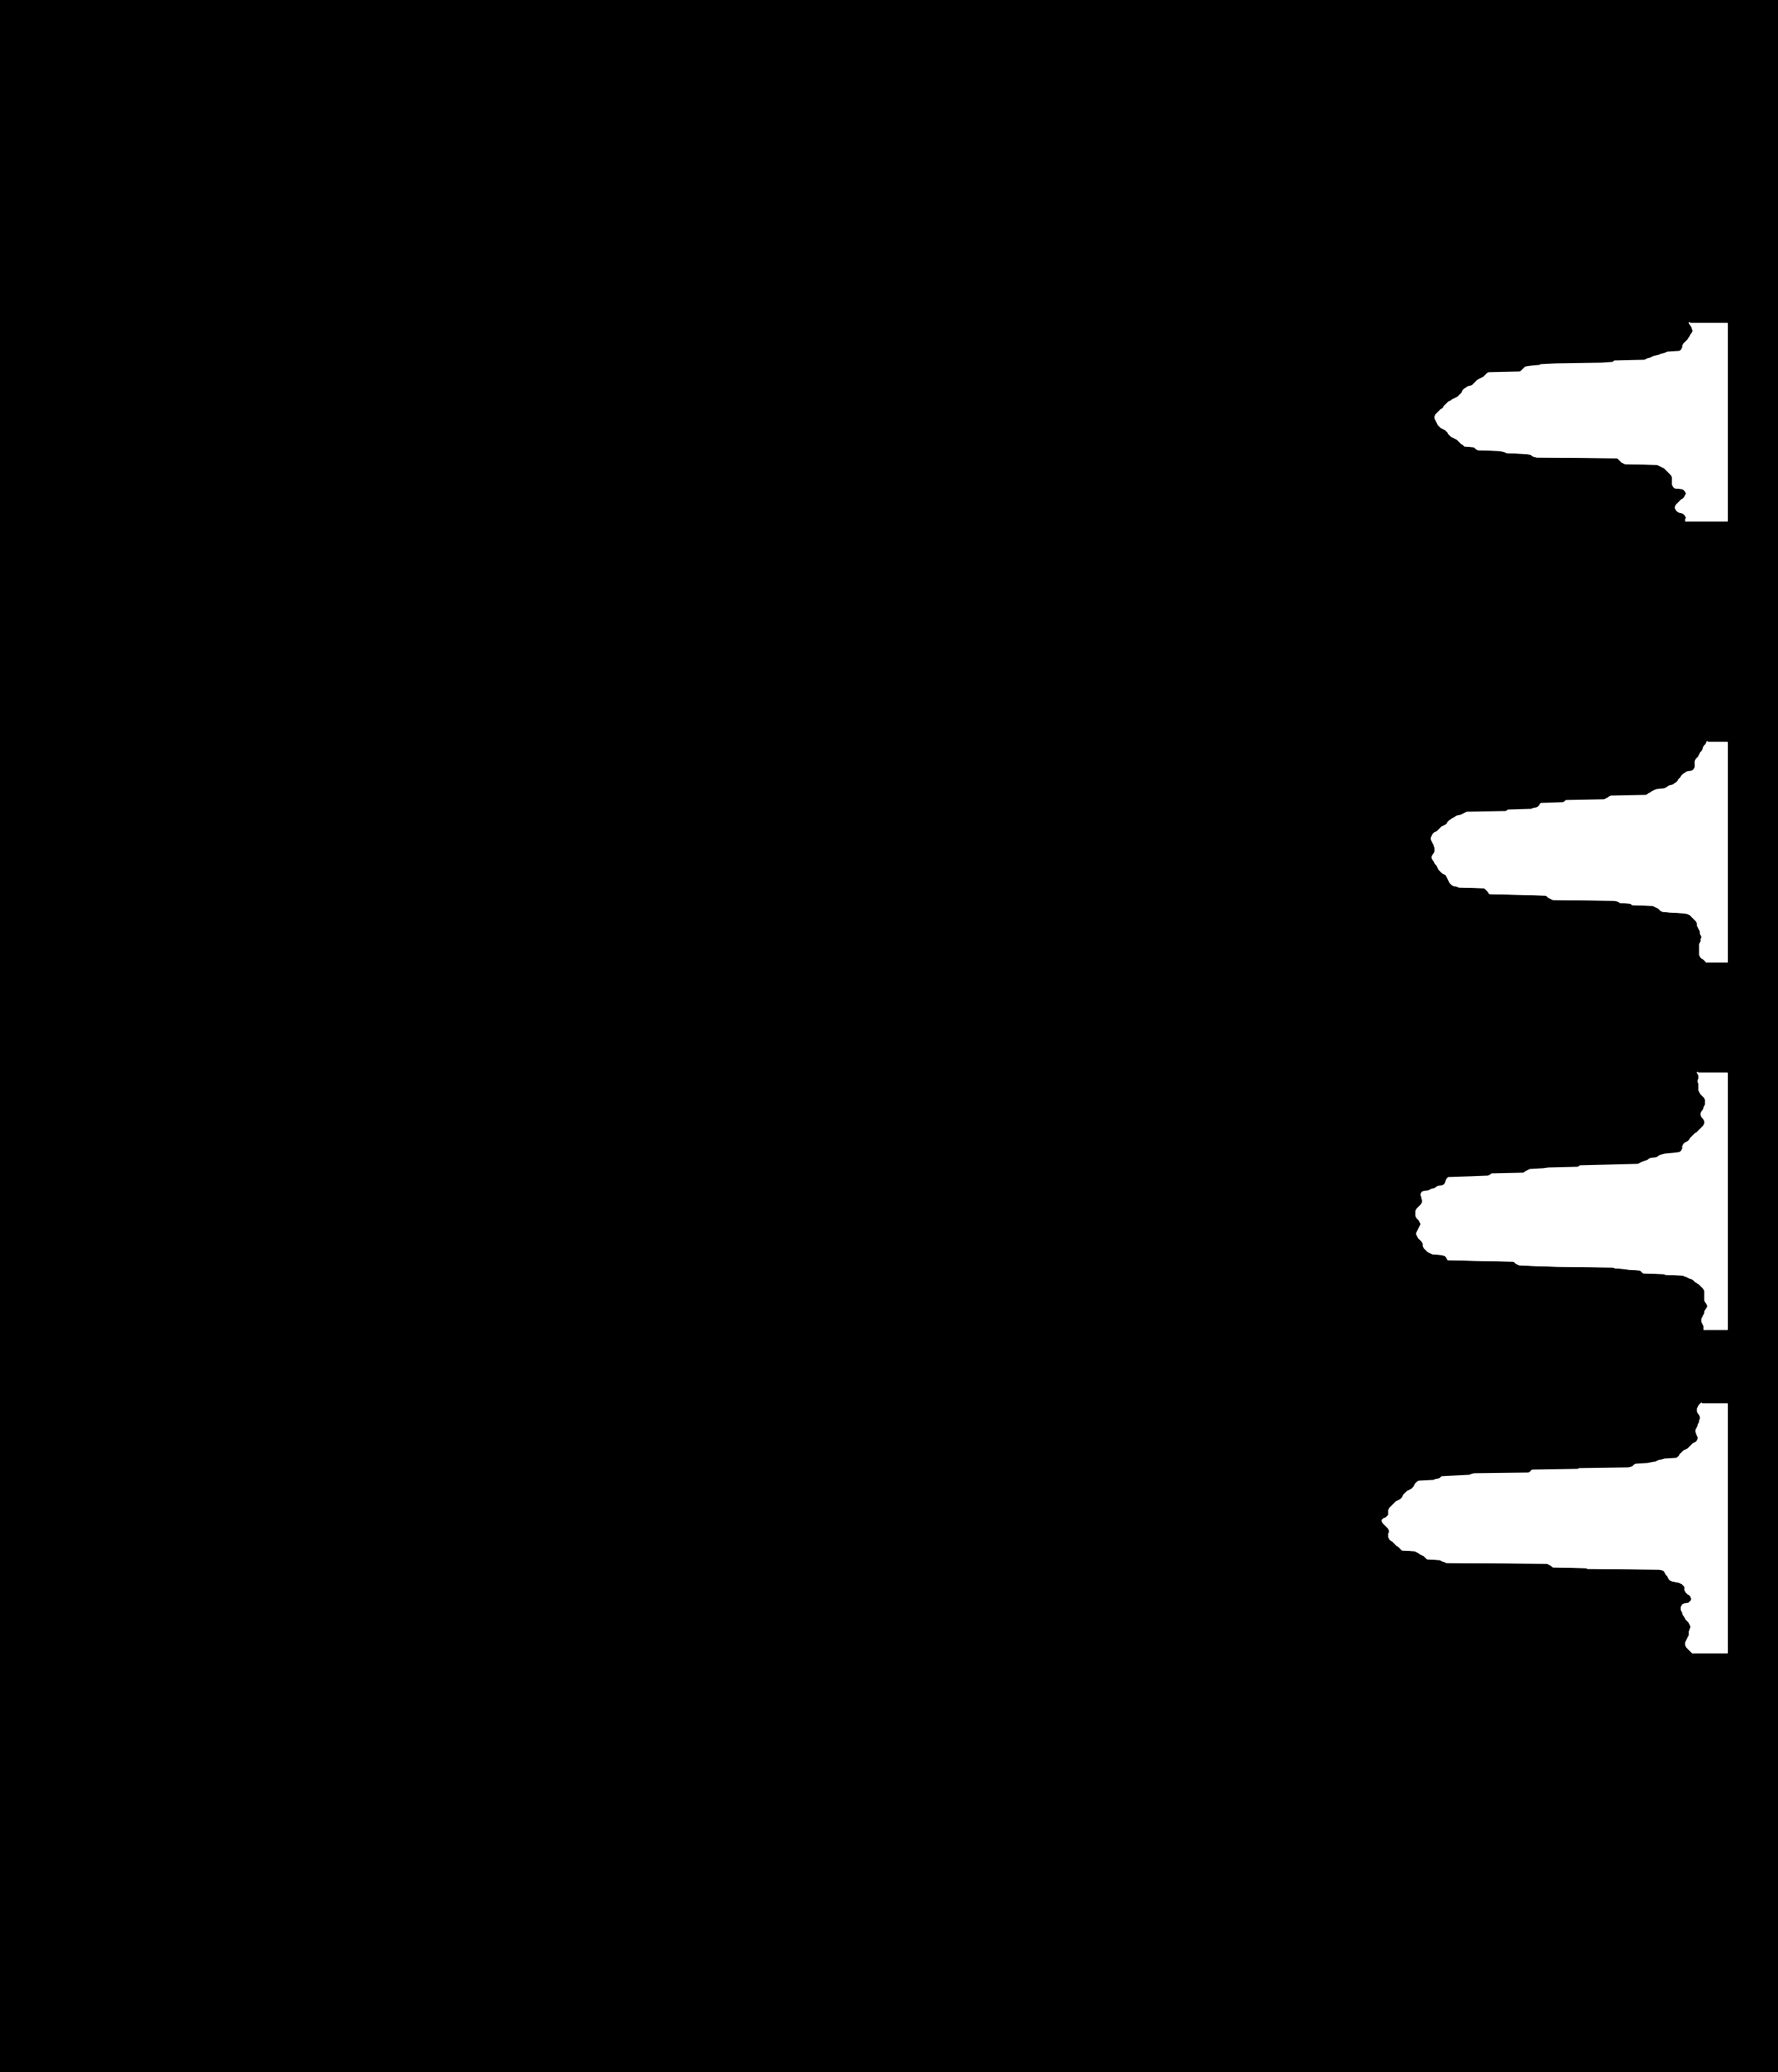

In [123]:
plt.figure(figsize=(2400 / 96, 2800 / 96), dpi=96)
plt.style.use('dark_background')
plt.axes([0, 0, 1, 1], frameon=False)
for leaf in leaves:
    plt.plot(leaf[:, 1], leaf[:, 0], c='w', alpha=1)
    plt.fill_betweenx(leaf[:, 0], leaf[:, 1], x2=2340, color='w', alpha=1)
fig = plt.imshow(image, cmap="gray", alpha=0)
plt.ylim(2800, 0)
plt.xlim(0, 2400)
plt.box(False)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig("mask_only.tiff")
#plt.savefig(os.path.join(out_folder, '{}_{}mm_mask_{}.tiff'.format('_'.join(split), dist, leaf_position)))
plt.close('all')